---
## Heart Attack Prediction
---
### Aurthor: Avinash Bagul
##### MSc Artificial Intelligence (University of Aberdeen)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as profile

In [2]:
df = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


AxesSubplot(0.125,0.125;0.775x0.755)


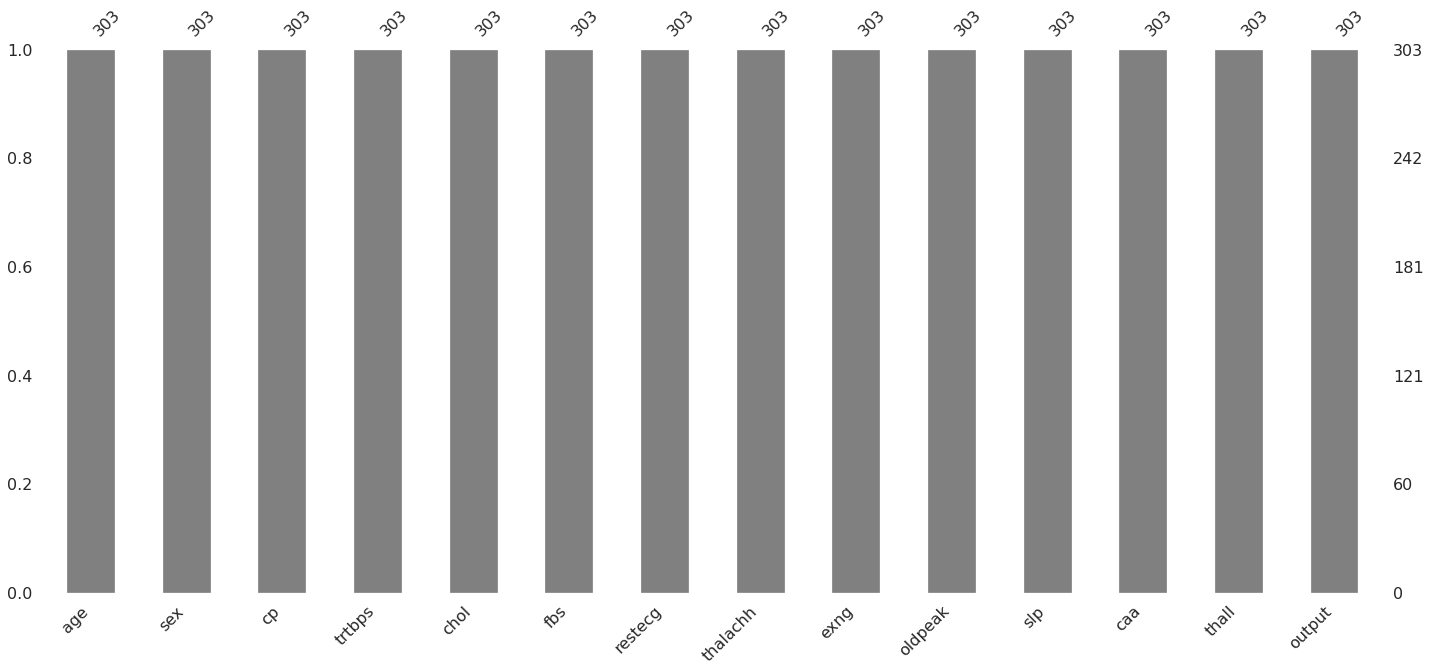

In [6]:
import missingno as msno
n = msno.bar(df,color="gray")
print(n)

In [7]:
profile.ProfileReport(df)

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

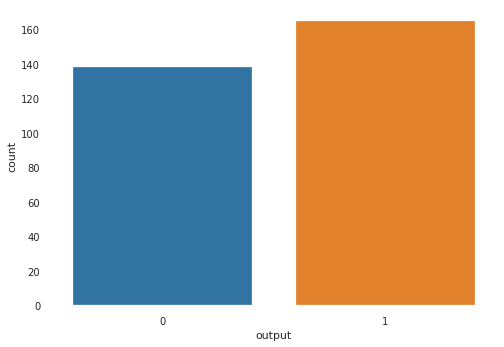

In [8]:
sns.countplot(x="output",data = df)
plt.show()

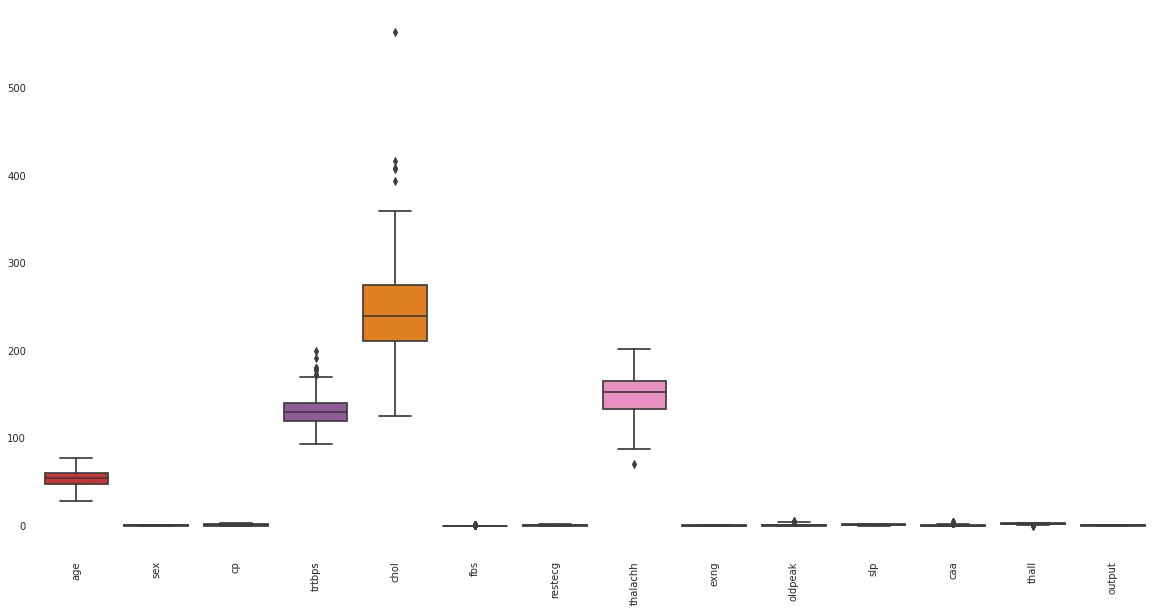

In [9]:
plt.figure(figsize=(20,10))
sns.boxplot(data = df,palette = "Set1")
plt.xticks(rotation=90)
plt.show()

In [10]:
def removeOutlier(att, df):

    lowerbound = att.mean() - 3 * att.std()
    upperbound = att.mean() + 3 * att.std()

    print('lowerbound: ',lowerbound,' -------- upperbound: ', upperbound )

    df1 = df[(att > lowerbound) & (att < upperbound)]

    print((df.shape[0] - df1.shape[0]), ' number of outliers from ', df.shape[0] )
    print(' ******************************************************')
    
    df = df1.copy()

    return df

In [11]:
df = removeOutlier(df.trtbps, df)
df = removeOutlier(df.chol, df)
df

lowerbound:  79.00933393568636  -------- upperbound:  184.23819081678892
2  number of outliers from  303
 ******************************************************
lowerbound:  90.29311096799373  -------- upperbound:  401.7135335502787
4  number of outliers from  301
 ******************************************************


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


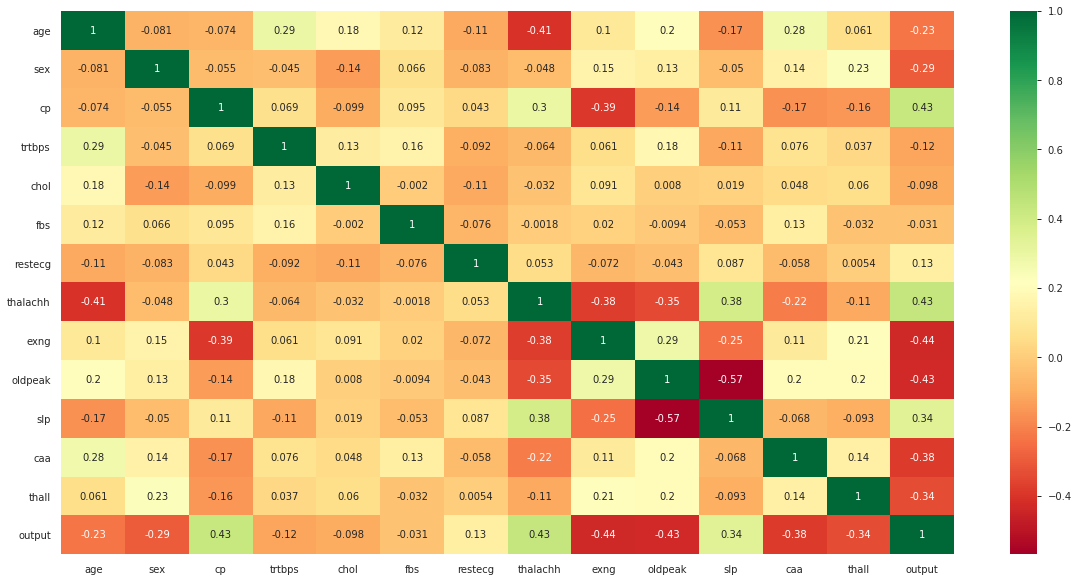

In [12]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,10))
g = sns.heatmap(df[top_corr_features].corr(),annot = True,cmap = "RdYlGn")

In [13]:
df.output.value_counts()

1    163
0    134
Name: output, dtype: int64

In [14]:
from sklearn.utils import resample

# Separate Target Classes
df_1 = df[df.output==1]
df_2 = df[df.output==0]
 
# Upsample minority class
df_upsample_1 = resample(df_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=163,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_1, df_upsample_1])
 
# Display new class counts
df_upsampled.output.value_counts()

0    163
1    163
Name: output, dtype: int64

In [15]:
x = df_upsampled.drop('output', axis = 1)
y = df_upsampled['output'] 


In [16]:
from sklearn.model_selection import train_test_split as tts

x_train,x_test, y_train, y_test = tts(x,y, test_size = 0.3)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [18]:
# Function to Evaluate

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from mlxtend.plotting import plot_confusion_matrix

def evaluator(y_test, y_pred):    
    
    # Accuracy:
    print('Accuracy is: ', accuracy_score(y_test,y_pred))
    print('')
    # Classification Report:
    print('Classification Report: \n',classification_report(y_test,y_pred))

    # Area Under The Curve Score:

    lb = LabelBinarizer()
    y_test1 = lb.fit_transform(y_test)
    y_pred1 =lb.transform(y_pred)
    print('AUC_ROC Score: ',roc_auc_score(y_test1,y_pred1,average='macro'),'\n\n')

    print('Confusion Matrix: \n\n')
    plt.style.use("ggplot")
    cm = confusion_matrix(y_test,y_pred)
    plot_confusion_matrix(conf_mat = cm,figsize=(8,6),show_normed=True)

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()

rf_classifier.fit(x_train,y_train)

RandomForestClassifier()

Accuracy is:  0.9081632653061225

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.93      0.93        60
           1       0.89      0.87      0.88        38

    accuracy                           0.91        98
   macro avg       0.90      0.90      0.90        98
weighted avg       0.91      0.91      0.91        98

AUC_ROC Score:  0.9008771929824562 


Confusion Matrix: 




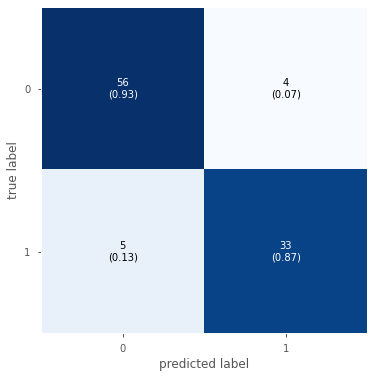

In [20]:
pred_rf = rf_classifier.predict(x_test)

evaluator(y_test, pred_rf)

In [21]:
from catboost import CatBoostClassifier

cat_classifier = CatBoostClassifier(iterations=1000, verbose = 0)

cat_classifier.fit(x_train, y_train)

Accuracy is:  0.8877551020408163

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91        60
           1       0.86      0.84      0.85        38

    accuracy                           0.89        98
   macro avg       0.88      0.88      0.88        98
weighted avg       0.89      0.89      0.89        98

AUC_ROC Score:  0.8793859649122806 


Confusion Matrix: 




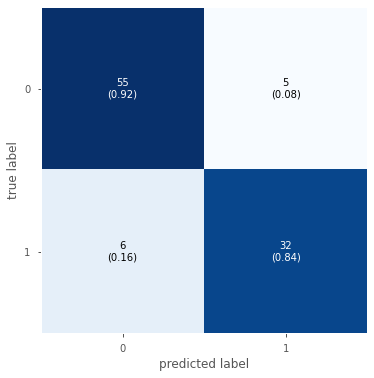

In [22]:
pred_cat = cat_classifier.predict(x_test)

evaluator(y_test, pred_cat)

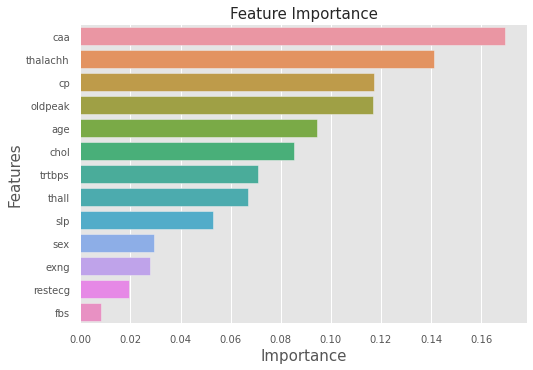

In [23]:
important_features = pd.DataFrame({'Features': x.columns, 
                                   'Importance': rf_classifier.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

Checking for overfitting

>1, train: 0.776, test: 0.714
>2, train: 0.803, test: 0.786
>3, train: 0.895, test: 0.776
>4, train: 0.925, test: 0.837
>5, train: 0.961, test: 0.878
>6, train: 0.982, test: 0.888
>7, train: 0.987, test: 0.878
>8, train: 0.996, test: 0.867
>9, train: 1.000, test: 0.867
>10, train: 1.000, test: 0.888
>11, train: 1.000, test: 0.888
>12, train: 1.000, test: 0.867
>13, train: 1.000, test: 0.867
>14, train: 1.000, test: 0.888
>15, train: 1.000, test: 0.888
>16, train: 1.000, test: 0.878
>17, train: 1.000, test: 0.867
>18, train: 1.000, test: 0.898
>19, train: 1.000, test: 0.878
>20, train: 1.000, test: 0.867


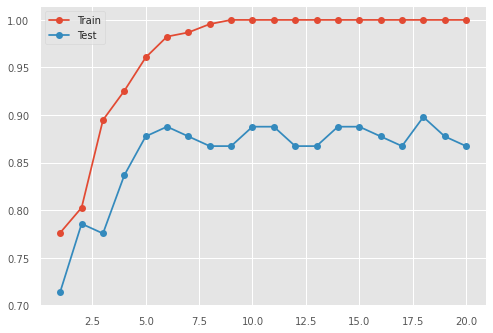

In [24]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = DecisionTreeClassifier(max_depth=i)
    # fit model on the training dataset
    model.fit(x_train, y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(x_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(x_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [25]:
from sklearn.model_selection import KFold
 
k = 5
kf = KFold(n_splits=k, shuffle = True)
cat_classifier = CatBoostClassifier(iterations=1000, verbose = 0)
 
acc_score = []
 
for train_index , test_index in kf.split(x):
    x_train,x_test, y_train, y_test = tts(x,y, test_size = 0.3)
     
    cat_classifier.fit(x_train,y_train)
    pred_values = model.predict(x_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.7551020408163265, 0.7551020408163265, 0.8061224489795918, 0.7857142857142857, 0.7448979591836735]
Avg accuracy : 0.7693877551020408
